EDA 

In [10]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    


Load data

In [13]:
fp_CTA = '..\data\Mostra Set de dades 1_ Consum total agregat.parquet'
fp_DCA = '..\data\Mostra Set de dades 2_Detecció de consums anòmals.parquet'

from src.data_preprocessing import load_parquet_to_df
df_DCA = load_parquet_to_df(fp_DCA)
df_CTA = load_parquet_to_df(fp_CTA)

['poliza_suministro', 'numeroseriecontador', 'consumo_real', 'fecha_hora', 'codi_anomalia', 'data_inici', 'data_fi']
['secció censal', 'districte', 'municipi', 'data', 'ús', 'nombre de comptadors', 'consum acumulat (l']


Display sample of data

In [14]:
print("CTA shape:",df_CTA.shape)
print("DCA shape:",df_DCA.shape)

display(df_CTA.head())
display(df_DCA.head())

CTA shape: (963419, 7)
DCA shape: (25977, 7)


,secció censal,districte,municipi,data,ús,nombre de comptadors,consum acumulat (l
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571


,poliza_suministro,numeroseriecontador,consumo_real,fecha_hora,codi_anomalia,data_inici,data_fi
0,JSM5YS4KVQUI5DQA,RMQO6U3MP5TS4QUL,NaN,2024-06-17 00:00:00,163840,2024-07-15,2024-09-13
1,JSM5YS4KVQUI5DQA,RMQO6U3MP5TS4QUL,21.0,2024-06-17 00:56:13,163840,2024-07-15,2024-09-13
2,JSM5YS4KVQUI5DQA,RMQO6U3MP5TS4QUL,7.0,2024-06-17 01:56:13,163840,2024-07-15,2024-09-13
3,JSM5YS4KVQUI5DQA,RMQO6U3MP5TS4QUL,0.0,2024-06-17 02:56:13,163840,2024-07-15,2024-09-13
4,JSM5YS4KVQUI5DQA,RMQO6U3MP5TS4QUL,0.0,2024-06-17 03:56:13,163840,2024-07-15,2024-09-13


In [33]:
'''
CHANGE TIME
'''
df_CTA['data']=pd.to_datetime(df_CTA['data'])
df_DCA['fecha_hora']=pd.to_datetime(df_DCA['fecha_hora'])
df_DCA['data_inici']=pd.to_datetime(df_DCA['data_inici'])
df_DCA['data_fi']=pd.to_datetime(df_DCA['data_fi'])

ANALYSIS OF CTA

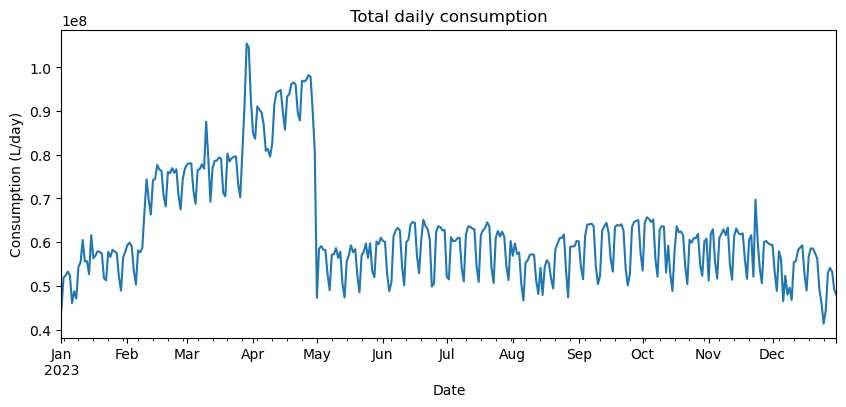

In [ ]:
'''
Total daily consumption
'''
total_consu=df_CTA.groupby('data')['consum acumulat (l'].sum()
plt.figure(figsize=(10,4))
total_consu.plot()
plt.title("Total daily consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (L/day)")
plt.show()

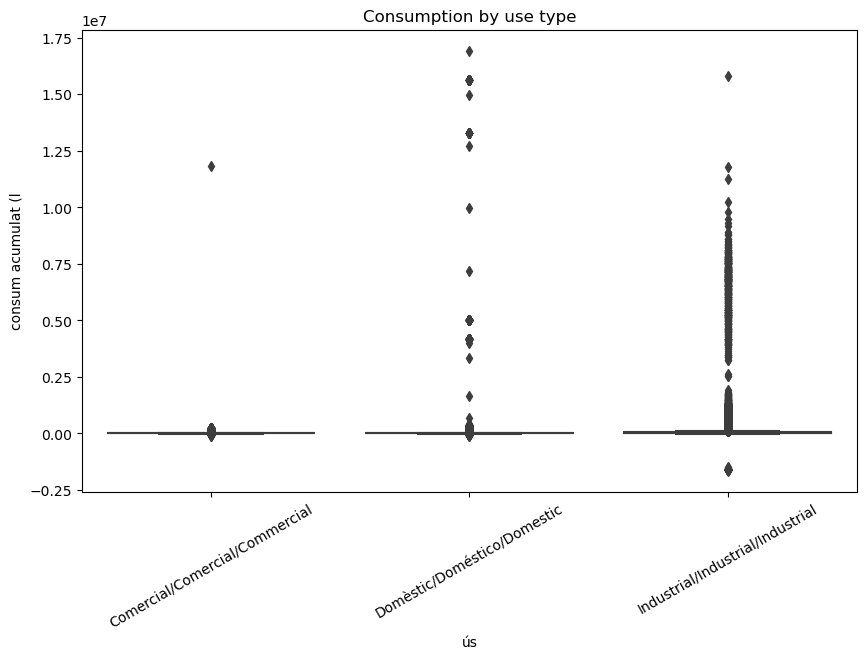

In [17]:
'''
Consumption by type
'''
plt.figure(figsize=(10,6))
sns.boxplot(data=df_CTA,x='ús',y='consum acumulat (l')
plt.title("Consumption by use type")
plt.xticks(rotation=30)
plt.show()


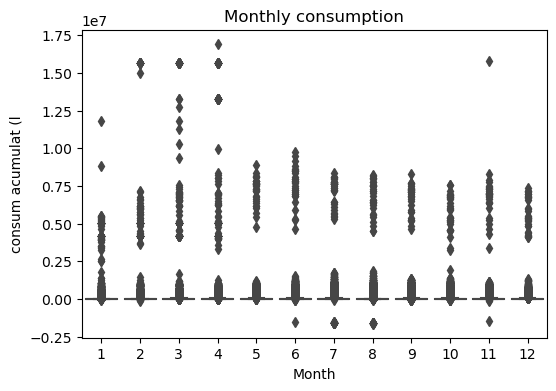

In [19]:
'''Monthly focused
'''
df_CTA['month']=df_CTA['data'].dt.month
plt.figure(figsize=(6,4))
sns.boxplot(data=df_CTA,x='month',y='consum acumulat (l')
plt.title("Monthly consumption")
plt.xlabel("Month")
plt.show()


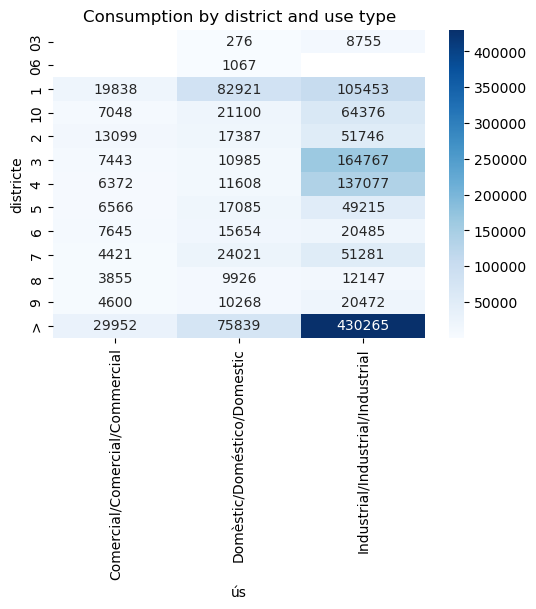

In [20]:
hm=df_CTA.pivot_table(values='consum acumulat (l',index='districte',columns='ús',aggfunc='mean')
plt.figure(figsize=(6,4))
sns.heatmap(hm,annot=True,fmt=".0f",cmap="Blues")
plt.title("Consumption by district and use type")
plt.show()

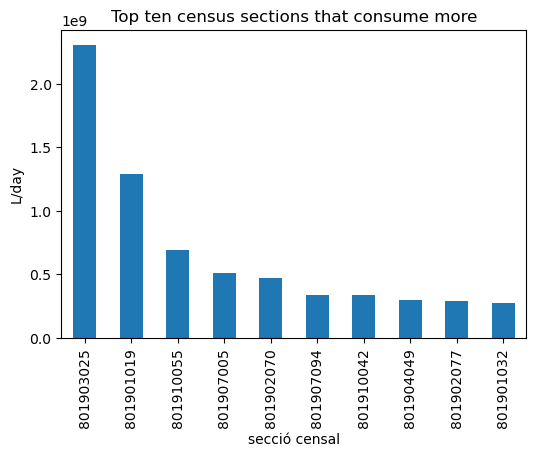

In [23]:
'''Census sections
'''

top_sections=df_CTA.groupby('secció censal')['consum acumulat (l'].sum().sort_values(ascending=False).head(10)
top_sections.plot(kind='bar',figsize=(6,4))
plt.title("Top ten census sections that consume more")
plt.ylabel("L/day")
plt.show()

DCA ANALYSIS

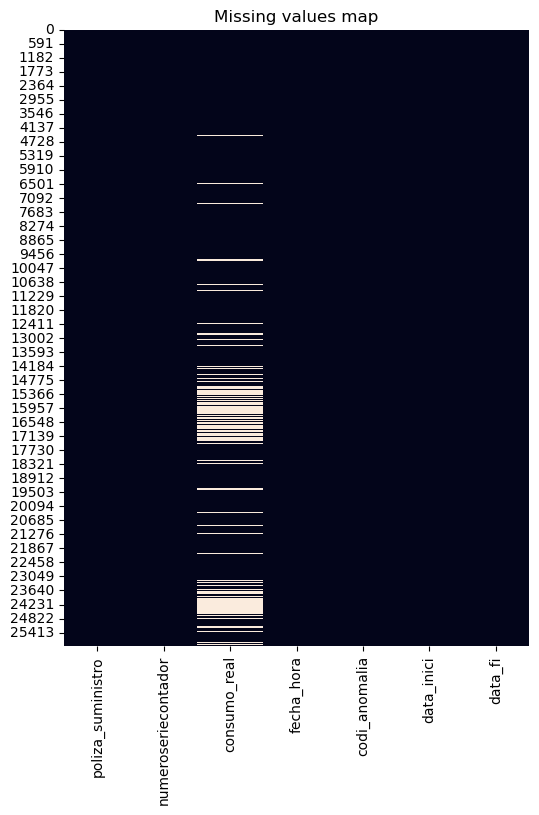

In [26]:
plt.figure(figsize=(6,8))
sns.heatmap(df_DCA.isna(),cbar=False)
plt.title("Missing values map")
plt.show()

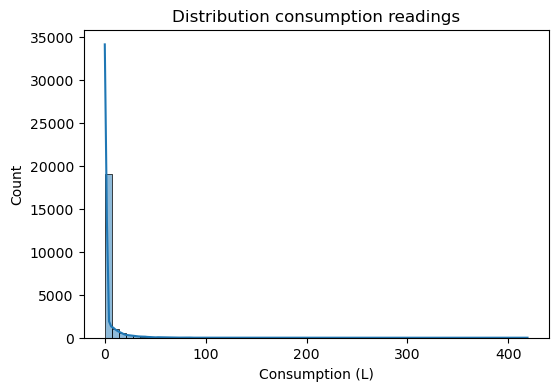

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(df_DCA['consumo_real'],bins=60,kde=True)
plt.title("Distribution consumption readings")
plt.xlabel("Consumption (L)")
plt.show()

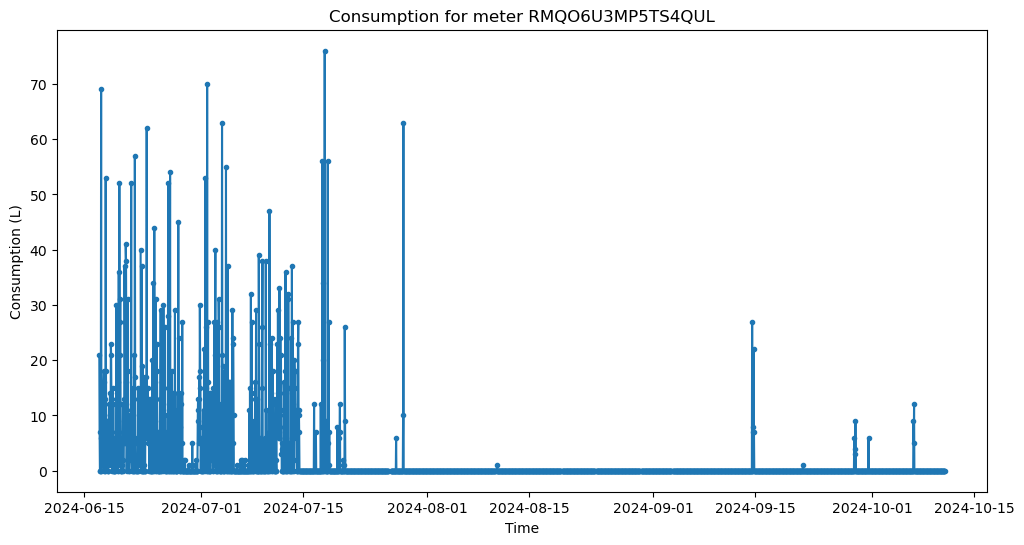

In [38]:
'''
Sample meter
'''
sample=df_DCA['numeroseriecontador'].iloc[0]
subset=df_DCA[df_DCA['numeroseriecontador']==sample]
plt.figure(figsize=(12,6))
plt.plot(subset['fecha_hora'],subset['consumo_real'],marker='.')
plt.title(f"Consumption for meter {sample}")
plt.xlabel("Time")
plt.ylabel("Consumption (L)")
plt.show()


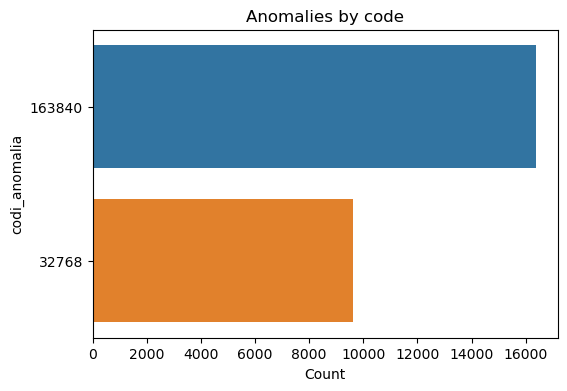

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(y='codi_anomalia',data=df_DCA,order=df_DCA['codi_anomalia'].value_counts().index)
plt.title("Anomalies by code")
plt.xlabel("Count")
plt.show()

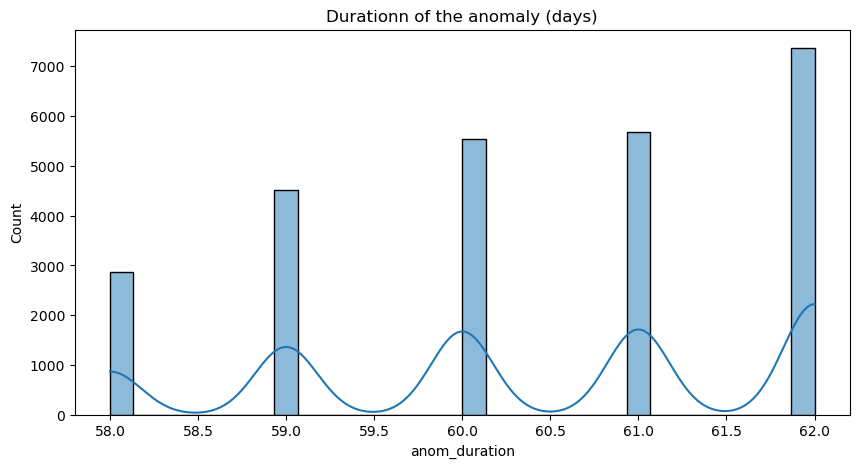

In [34]:
df_DCA['anom_duration']=(df_DCA['data_fi']-df_DCA['data_inici']).dt.days
plt.figure(figsize=(10,5))
sns.histplot(df_DCA['anom_duration'],bins=30,kde=True)
plt.title("Durationn of the anomaly (days)")
plt.show()